In [1]:
%pylab inline
from __future__ import division, print_function
import pandas as pd
import numpy as np
import scipy as sp
from pandas.io.json import json_normalize
import json
from datetime import date, timedelta
from time import time

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore');

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_raw = pd.read_csv('/Users/bwu/testing/large_data_folder/last_carousel_table_6_rolling.csv')

In [3]:
#Initial cleaning of feature names
df_raw.columns = [col_names.replace('rolling_','') for col_names in df_raw.columns.values]

In [4]:
df_raw.head()

,first_visit_num,experiment_visid,experiment_control,experiment_test,visid,visit_num,visit_ux_type,visit_date,visit_hour,visit_geo_country,...,past28d_page_interactions_per_view,past28d_views_section_max,past28d_views_property_max,past28d_visits_ref_max,past28d_visits_camp_max,past28d_views_section_primary,past28d_views_property_primary,past28d_visits_ref_primary,past28d_visits_camp_primary,visit_date_num
0,1,10037871461938082175,1,0,10037871461938082175,2,Desktop Web,2016-08-20 00:00:00 UTC,23,usa,...,0.125000,4.0,7.0,1.0,1.0,LDP,Buy,Search,Other,1
1,1,10054193884270425556,1,0,10054193884270425556,5,Desktop Web,2016-08-23 00:00:00 UTC,14,usa,...,0.333333,2.0,2.0,1.0,1.0,SRP,Buy,Search,Other,1
2,1,1015648931363104529,0,1,1015648931363104529,1,Desktop Web,2016-08-26 00:00:00 UTC,12,usa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1,10159343641416471091,1,0,10159343641416471091,1,Desktop Web,2016-08-20 00:00:00 UTC,10,usa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1,10207343532564741988,0,1,10207343532564741988,5,Desktop Web,2016-08-28 00:00:00 UTC,11,usa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
#Desktop only
df_raw = df_raw[df_raw.visit_ux_type=="Desktop Web"]

In [16]:
df_raw.shape

(1090555, 194)

### Select Relavant Features

In [6]:
# seller = ['visit_nfs_recentlysold_lead', 'current_day_nfs_recentlysold_lead', 'past28d_nfs_recentlysold_lead', 
#           'past7d_nfs_recentlysold_lead','visit_seller_lead', 'current_day_seller_lead', 'past28d_seller_lead', 'past7d_seller_lead',
#             'visit_nfs_offmarket_lead', 'current_day_nfs_offmarket_lead', 
#             'past28d_nfs_offmarket_lead', 'past7d_nfs_offmarket_lead', 
#             'planning_to_sell', 'registered_seller', 'new_survey_seller', ]

In [17]:
identifiers = ['experiment_control', 'experiment_test', 'visid',]

In [18]:
buyer_leads = ['current_day_lead_buy', 
#          'visit_lead_buy', 
#          'past28d_lead_buy', 
#          'past7d_lead_buy'
        ]

In [19]:
secondary_features = ['visit_geo_country', 'visit_geo_region', 'visit_campaign_subtype',
                        'past7d_visits_geo_usa', 
                        'past28d_views_pct_section_home', 'past28d_views_pct_section_srp', 
                        'past28d_views_pct_section_ldp', 'past28d_views_pct_section_news', 
                        'past28d_views_pct_section_acct', 'past28d_views_pct_property_sold', 
                        'past28d_views_pct_property_buy', 'past28d_views_pct_property_rent', 
                        'past28d_views_pct_property_sell', 'past28d_visits_pct_geo_usa', 'past28d_visits_pct_ref_direct', 
                        'past28d_visits_pct_ref_search', 'past28d_visits_pct_ref_internal', 
                        'past28d_visits_pct_ref_social', 'past28d_visits_pct_ref_other', 
                        'past28d_visits_pct_camp_paid_search', 'past28d_visits_pct_camp_email', 
                        'past28d_visits_pct_camp_syndication', 'past28d_visits_pct_camp_display', 
                        'past28d_visits_pct_camp_affiliate', 'past28d_visits_pct_camp_social', 
                        'past28d_visits_pct_camp_other', 'past28d_visits_geo_usa', 
                      
                        'ldp_sale_views', 'ldp_rent_views', 'ldp_unknown_views', 'ldp_sale_price_count', 'ldp_rent_price_count', 'geo_count', 
                        'ldp_sale_price_mean', 'ldp_rent_price_mean', 'ldp_sale_price_median', 'ldp_sale_price_sd', 'ldp_sale_price_cv', 
                        'ldp_rent_price_sd', 'ldp_rent_price_cv', 'latitude_mean', 'longitude_mean', 'geo_distance_to_mean_avg', 
                        'zip_med_income_median', 'zip_med_age_median', 'ldp_sale_price_zip_mean_abs_dev_mean', 
                        'ldp_sale_price_zip_zscore_mean', 'distinct_zips', 'distinct_states',
                      
                        'past7d_ldp_rent_price_count', 'past7d_ldp_sale_price_mean', 'past7d_ldp_rent_price_mean', 
                        'past7d_ldp_sale_price_median', 'past7d_ldp_rent_price_median', 'past7d_ldp_sale_price_sd', 'past7d_zip_med_age_median', 
                        'past7d_ldp_sale_price_cv', 'past7d_ldp_rent_price_sd', 'past7d_ldp_rent_price_cv', 'past7d_latitude_mean', 
                        'past7d_longitude_mean', 'past7d_zip_med_income_median', 'past7d_ldp_sale_price_zip_mean_abs_dev_mean', 'past7d_ldp_sale_price_zip_zscore_mean',

                        'past28d_ldp_sale_price_mean', 'past28d_ldp_rent_price_mean', 'past28d_ldp_sale_price_median',
                        'past28d_ldp_rent_price_median', 'past28d_ldp_sale_price_sd', 'past28d_ldp_sale_price_cv', 
                        'past28d_ldp_rent_price_sd', 'past28d_ldp_rent_price_cv', 'past28d_latitude_mean', 
                        'past28d_longitude_mean',  'past28d_zip_med_income_median', 
                        'past28d_zip_med_age_median',
                        'past28d_ldp_sale_price_zip_mean_abs_dev_mean', 'past28d_ldp_sale_price_zip_zscore_mean', 
                        
                        'visit_date_num', 'visit_date', 
                        'visit_views', 'visit_views_ldp_for_sale', 'visit_views_ldp_rent', 
                     ]

In [20]:
primary_features = ['visit_num', 'visit_hour', 'visit_referrer_type', 
                    'visit_campaign_type', 'visit_landing_page_type', 
                                        
                    'past28d_visits_registered', 
                    
                    'past7d_views', 'past7d_page_interactions', 'past7d_visits', 'past7d_active_days', 
                    'past7d_views_section_home', 'past7d_views_section_srp', 'past7d_views_section_ldp', 
                    'past7d_views_section_news', 'past7d_views_section_acct', 'past7d_views_property_sold', 
                    'past7d_views_property_buy', 'past7d_views_property_rent', 'past7d_views_property_sell', 
                    'past7d_visits_ref_direct', 'past7d_visits_ref_search', 'past7d_visits_ref_internal', 
                    'past7d_visits_ref_social', 'past7d_visits_ref_other', 'past7d_visits_camp_paid_search', 
                    'past7d_visits_camp_email', 'past7d_visits_camp_syndication', 'past7d_visits_camp_display', 
                    'past7d_visits_camp_affiliate', 'past7d_visits_camp_social', 'past7d_visits_camp_other', 
                    
                    'past28d_views', 'past28d_page_interactions', 'past28d_visits', 'past28d_active_days', 
                    'past28d_views_section_home', 'past28d_views_section_srp', 'past28d_views_section_ldp', 
                    'past28d_views_section_news', 'past28d_views_section_acct', 'past28d_views_property_sold', 
                    'past28d_views_property_buy', 'past28d_views_property_rent', 'past28d_views_property_sell', 
                    'past28d_visits_ref_direct', 'past28d_visits_ref_search', 
                    'past28d_visits_ref_internal', 'past28d_visits_ref_social', 'past28d_visits_ref_other', 
                    'past28d_visits_camp_paid_search', 'past28d_visits_camp_email', 'past28d_visits_camp_syndication', 
                    'past28d_visits_camp_display', 'past28d_visits_camp_affiliate', 
                    'past28d_visits_camp_social', 'past28d_visits_camp_other',  
                    
                    'past7d_ldp_sale_views', 'past7d_ldp_rent_views', 'past7d_ldp_unknown_views', 
                    'past7d_ldp_sale_price_count', 'past7d_distinct_zips', 'past7d_distinct_states', 
                    
                    'past28d_ldp_sale_views', 'past28d_ldp_rent_views', 'past28d_ldp_unknown_views', 
                    'past28d_ldp_sale_price_count', 'past28d_ldp_rent_price_count', 
                    'past28d_distinct_zips', 'past28d_distinct_states', 
                                                            
                    'past7d28d_views_ratio', 'past7d_visits_per_active_day', 
                    'past7d_views_per_active_day', 'past7d_views_per_visit', 'past7d_page_interactions_per_view', 
                    
                    'past28d_visits_per_active_day', 'past28d_views_per_active_day', 'past28d_views_per_visit', 
                    'past28d_page_interactions_per_view', 'past28d_views_section_max', 'past28d_views_property_max', 
                    'past28d_visits_ref_max', 'past28d_visits_camp_max', 'past28d_views_section_primary', 
                    'past28d_views_property_primary', 'past28d_visits_ref_primary', 'past28d_visits_camp_primary', 
                   ]

In [21]:
#Only use primary features
df_primary = df_raw[primary_features]

In [22]:
#Seperate Numeric and Categorical features
primary_numeric_columns = df_primary.select_dtypes(include=[np.number]).columns.values
primary_categorical_columns = list(set(df_primary.columns.values) - set(primary_numeric_columns))

### Dummify Categorical Features

In [23]:
primary_categorical_columns

['past28d_visits_camp_primary',
 'visit_campaign_type',
 'visit_referrer_type',
 'past28d_visits_ref_primary',
 'visit_landing_page_type',
 'past28d_views_section_primary',
 'past28d_views_property_primary']

In [24]:
#Other numeric features that should be considered as categorical variables
other_categorical_columns = ['visit_hour']

In [25]:
#Dummify categorical variables
for column in primary_categorical_columns+other_categorical_columns:
    dummies = pd.get_dummies(df_primary[column], prefix = column)
    #Add dummy columns to matrix and remove original column from matrix
    df_primary[dummies.columns] = dummies
    df_primary = df_primary.drop(column,1)

In [26]:
dummified_categorical_features = list(set(df_primary.columns.values) - set(primary_numeric_columns))
final_numeric_features = list(set(df_primary.columns.values) - set(dummified_categorical_features))

### Handle Missing Numeric Values

In [27]:
#Change all numeric missing values to zeroes (this is in fact true for this dataset - nan represent 0's)
df_primary = df_primary.fillna(0)

In [28]:
#Check if there are any null values remaining in the data
pd.isnull(df_primary).sum().sum()

0

In [29]:
df_primary.head()

,visit_num,past28d_visits_registered,past7d_views,past7d_page_interactions,past7d_visits,past7d_active_days,past7d_views_section_home,past7d_views_section_srp,past7d_views_section_ldp,past7d_views_section_news,...,visit_hour_14,visit_hour_15,visit_hour_16,visit_hour_17,visit_hour_18,visit_hour_19,visit_hour_20,visit_hour_21,visit_hour_22,visit_hour_23
0,2,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Standardize Numeric Features

### Outliers Function

In [30]:
#Not looking at outliers in X, only look for outliers in Y (i.e. # of leads submitted)
def is_outlier_mean(data, m = 1000):
    return abs(data - np.mean(data)) > m * np.std(data)

### Consolidate Dataframe by Adding Back Identifiers and Y Labels for Analysis

In [31]:
df = pd.concat([df_raw[identifiers], df_raw[buyer_leads], df_primary], axis=1)

### Eliminate Outliers in Lead Submissions (those who submitted more than 50 leads a day)

In [32]:
df = df[df.current_day_lead_buy < 50]

In [33]:
(df_raw.current_day_lead_buy >= 50).sum()

4

### Lift and Segement Size Function for Every Numeric Feature

In [34]:
len(final_numeric_features)

78

In [35]:
def print_hist(feature):

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    # ax2 = ax1.twiny()
    
    df_excl_outliers = df[~is_outlier_mean(df[feature])]
    in_control = (df_excl_outliers.experiment_control == 1)
    in_test = ~in_control #alternatively, df.experiment_test == 1
    
    ax1.set_title("Histogram for " + feature)
    ax1.hist(df_excl_outliers[in_control][feature], 
             bins = len(unique(df_excl_outliers[in_control][feature])), 
#              range = (0,10), 
             alpha=0.5,)
    ax1.hist(df_excl_outliers[in_test][feature], 
             bins = len(unique(df_excl_outliers[in_test][feature])), 
#              range = (0,10), 
             alpha=0.5,)
    ax1.set_xlim((0,10))
    
    plt.show();

In [215]:
# for f in final_numeric_features[:8]:
#     print_hist(f)

In [36]:
def lift_control_calc(feature, cutoff):
    
    df_excl_outliers = df[~is_outlier_mean(df[feature])]
    group = (df_excl_outliers[feature] >= cutoff)
    in_control = (df_excl_outliers.experiment_control == 1)
    in_test = ~in_control #alternatively, df.experiment_test == 1
    
    if (df_excl_outliers[group & in_control].shape[0]>0) and (df_excl_outliers[group & in_test].shape[0]>0):
    
        conversion_control = df_excl_outliers[group & in_control]['current_day_lead_buy'].sum() / df_excl_outliers[group & in_control].shape[0]
        conversion_test = df_excl_outliers[group & in_test]['current_day_lead_buy'].sum() / df_excl_outliers[group & in_test].shape[0]
        conversion_from_last_carousel = conversion_test - conversion_control
        relative_segment_size = df_excl_outliers[group].shape[0] / df.shape[0]
        absolute_segment_size = df_excl_outliers[group].shape[0]

        return cutoff, conversion_from_last_carousel, relative_segment_size, absolute_segment_size

In [48]:
# for f in final_numeric_features:
#     print()
#     print(f,":")
#     print("cutoff conversion from last carousel relative seg size")
#     print("====== ============================= =================")
#     for percent in [80,90,95]:
#         print(lift_control_calc(f, np.percentile(df[f], percent))[:3])

In [37]:
df['current_day_lead_buy'].sum() / df.shape[0]

0.01066800177158152

In [38]:
df[(df['past7d_views_section_ldp'] >= 18) & (df.experiment_control == 1)]['current_day_lead_buy'].sum() / df[(df['past7d_views_section_ldp'] >= 18) & (df.experiment_control == 1)].shape[0]

0.013103508926215812

In [39]:
df[(df['past7d_views_section_ldp'] >= 18) & (df.experiment_test == 1)]['current_day_lead_buy'].sum() / df[(df['past7d_views_section_ldp'] >= 18) & (df.experiment_test == 1)]['current_day_lead_buy'].shape[0]

0.016435369586180873

In [31]:
# promising_numeric_features = [
#     'past7d_views_section_ldp',
#     'past7d_views_section_home',
#     'past7d_views',
#     'past28d_visits_per_active_day',
#     'past7d_ldp_sale_views',
#     'past7d_ldp_sale_price_count',
#     'past7d_views_per_visit',
#     'past7d_visits_ref_direct',
#     'past28d_page_interactions',
#     'past28d_ldp_sale_views',
#     'past7d_page_interactions',
#     'past28d_visits_ref_internal',
#     'past7d28d_views_ratio',
#     'past7d_visits',
#     'past28d_distinct_zips',
#     'past28d_ldp_rent_price_count',
#     'past7d_active_days',
#     'past7d_page_interactions_per_view',
#     'past7d_views_property_buy',
#     'past28d_ldp_sale_price_count',
#     'past7d_views_per_active_day',
#     'past28d_views_per_active_day',
#     'past7d_visits_per_active_day',
#     'past28d_views_section_ldp',
# ]

In [49]:
# for f in promising_numeric_features:
#     print()
#     print(f,":")
#     print("cutoff conversion from last carousel relative seg size")
#     print("====== ============================= =================")
#     for percent in [80,90,95,97]:
#         print(lift_control_calc(f, np.percentile(df[f], percent))[:3])

In [40]:
featcut = {'past28d_active_days': 1,
 'past28d_distinct_states': 1,
 'past28d_distinct_zips': 1,
#  'past28d_ldp_rent_price_count': 1,
#  'past28d_ldp_rent_views': 1,
 'past28d_ldp_sale_price_count': 1,
 'past28d_ldp_sale_views': 1,
#  'past28d_ldp_unknown_views': 1,
 'past28d_page_interactions': 1,
#  'past28d_page_interactions_per_view': 1,
 'past28d_views': 1,
 'past28d_views_per_active_day': 1,
 'past28d_views_per_visit': 1,
 'past28d_views_property_buy': 1,
 'past28d_views_property_max': 1,
#  'past28d_views_property_rent': 1,
#  'past28d_views_property_sell': 1,
#  'past28d_views_property_sold': 1,
#  'past28d_views_section_acct': 1,
 'past28d_views_section_home': 1,
 'past28d_views_section_ldp': 1,
 'past28d_views_section_max': 1,
#  'past28d_views_section_news': 1,
 'past28d_views_section_srp': 1,
 'past28d_visits': 1,
#  'past28d_visits_camp_affiliate': 1,
#  'past28d_visits_camp_display': 1,
#  'past28d_visits_camp_email': 1,
 'past28d_visits_camp_max': 1,
#  'past28d_visits_camp_other': 1,
#  'past28d_visits_camp_paid_search': 1,
#  'past28d_visits_camp_social': 1,
#  'past28d_visits_camp_syndication': 1,
 'past28d_visits_per_active_day': 1,
 'past28d_visits_ref_direct': 1,
#  'past28d_visits_ref_internal': 1,
 'past28d_visits_ref_max': 1,
#  'past28d_visits_ref_other': 1,
#  'past28d_visits_ref_search': 1,
#  'past28d_visits_ref_social': 1,
 'past28d_visits_registered': 1,
 'past7d28d_views_ratio': 0.01,
 'past7d_active_days': 1,
 'past7d_distinct_states': 1,
 'past7d_distinct_zips': 1,
#  'past7d_ldp_rent_views': 1,
 'past7d_ldp_sale_price_count': 1,
 'past7d_ldp_sale_views': 1,
#  'past7d_ldp_unknown_views': 1,
 'past7d_page_interactions': 1,
#  'past7d_page_interactions_per_view': 1,
 'past7d_views': 1,
 'past7d_views_per_active_day': 1,
 'past7d_views_per_visit': 1,
 'past7d_views_property_buy': 1,
#  'past7d_views_property_rent': 1,
#  'past7d_views_property_sell': 1,
#  'past7d_views_property_sold': 1,
#  'past7d_views_section_acct': 1,
 'past7d_views_section_home': 1,
 'past7d_views_section_ldp': 1,
#  'past7d_views_section_news': 1,
 'past7d_views_section_srp': 1,
 'past7d_visits': 1,
#  'past7d_visits_camp_affiliate': 1,
#  'past7d_visits_camp_display': 1,
#  'past7d_visits_camp_email': 1,
 'past7d_visits_camp_other': 1,
#  'past7d_visits_camp_paid_search': 1,
#  'past7d_visits_camp_social': 1,
#  'past7d_visits_camp_syndication': 1,
 'past7d_visits_per_active_day': 1,
 'past7d_visits_ref_direct': 1,
#  'past7d_visits_ref_internal': 1,
#  'past7d_visits_ref_other': 1,
#  'past7d_visits_ref_search': 1,
#  'past7d_visits_ref_social': 1,
 'visit_num': 5
}

In [41]:
def lift_control_calc_2(feature, cutoff):
    
    df_excl_outliers = df[~is_outlier_mean(df[feature])]
    group = (df_excl_outliers[feature] >= cutoff)
    in_control = (df_excl_outliers.experiment_control == 1)
    in_test = ~in_control #alternatively, df.experiment_test == 1
    
    if (df_excl_outliers[group & in_control].shape[0]>0) and (df_excl_outliers[group & in_test].shape[0]>0):
    
        conversion_control = df_excl_outliers[group & in_control]['current_day_lead_buy'].sum() / df_excl_outliers[group & in_control].shape[0]
        conversion_test = df_excl_outliers[group & in_test]['current_day_lead_buy'].sum() / df_excl_outliers[group & in_test].shape[0]
        conversion_from_last_carousel = conversion_test - conversion_control
        relative_segment_size = df_excl_outliers[group].shape[0] / df.shape[0]
        absolute_segment_size = df_excl_outliers[group].shape[0]

        return feature, cutoff, conversion_from_last_carousel, relative_segment_size

In [42]:
final_cut = [lift_control_calc_2(feature, cutoff) for feature, cutoff in featcut.items()]

In [43]:
final_features = filter(lambda items: items[3] > 0.35, final_cut)

In [44]:
final_features

[('past28d_visits', 1, 0.0013150688200855819, 0.37431261811689687),
 ('past28d_active_days', 1, 0.0013150688200855819, 0.37431261811689687),
 ('past28d_visits_camp_max', 1, 0.0013150688200855819, 0.37431261811689687),
 ('past28d_visits_ref_max', 1, 0.0013150688200855819, 0.37431261811689687),
 ('past28d_views_section_ldp', 1, 0.0013368591862769705, 0.35349103343172394),
 ('past28d_visits_per_active_day',
  1,
  0.0013151805275780776,
  0.37430895024625166),
 ('past28d_views_per_visit', 1, 0.0013752709094803969, 0.3739980982090705),
 ('past28d_views', 1, 0.0013153645214271908, 0.3742832751517352),
 ('past28d_views_section_max', 1, 0.0012861094347592118, 0.37099319518298546),
 ('past28d_views_per_active_day',
  1,
  0.0013157085147152744,
  0.37423926070399277)]

###### 

In [45]:
group = (df.past28d_visits >= 1) |\
        (df.past28d_visits_ref_primary_Direct >= 1)
#         (df.past28d_active_days >= 1) |\
#         (df.past28d_visits_camp_max >= 1) |\
#         (df.past28d_visits_ref_max >= 1) |\
#         (df.past28d_views_section_ldp >= 1) |\
#         (df.past28d_visits_per_active_day >= 1) |\
#         (df.past28d_views_per_visit >= 1) |\
#         (df.past28d_views >= 1) |\
#         (df.past28d_views_section_max >= 1) |\
#         (df.past28d_views_per_active_day >= 1) 


df = df[~is_outlier_mean(df[feature])]
in_control = (df.experiment_control == 1)
in_test = ~in_control 

conversion_control = df[group & in_control]['current_day_lead_buy'].sum() / df[group & in_control].shape[0]
conversion_test = df[group & in_test]['current_day_lead_buy'].sum() / df[group & in_test].shape[0]
conversion_from_last_carousel = conversion_test - conversion_control
relative_segment_size = df[group].shape[0] / df.shape[0]
absolute_segment_size = df[group].shape[0]

print(conversion_from_last_carousel, relative_segment_size)

0.00131506882009 0.374312618117


In [46]:
lift_control_calc_2('past28d_visits', 1)

('past28d_visits', 1, 0.0013150688200855819, 0.37431261811689687)

In [47]:
def lift_control_categorical(categorical_feature):
    group = (df[categorical_feature] == 1)
    in_control = (df.experiment_control == 1)
    in_test = ~in_control 

    if (df[group & in_control].shape[0] != 0) & (df[group & in_test].shape[0] != 0):

        conversion_control = df[group & in_control]['current_day_lead_buy'].sum() / df[group & in_control].shape[0]
        conversion_test = df[group & in_test]['current_day_lead_buy'].sum() / df[group & in_test].shape[0]
        conversion_from_last_carousel = conversion_test - conversion_control
        relative_segment_size = df[group].shape[0] / df.shape[0]
        absolute_segment_size = df[group].shape[0]
        return conversion_from_last_carousel, relative_segment_size, absolute_segment_size
    else: return 0,0,0

In [48]:
for d in dummified_categorical_features:
    rate, relative_size, absolute_size = lift_control_categorical(d)
    if rate > 0.0013 and relative_size > 0.20:  
        print()
        print(d,":")
        print("lift                relative seg size")
        print("==================  =================")
        print(rate, relative_size)


past28d_views_property_primary_Buy :
lift                relative seg size
==================  =================
0.00162922600646 0.342413147116

past28d_views_section_primary_SRP :
lift                relative seg size
==================  =================
0.00173291994116 0.277034269832

past28d_visits_ref_primary_Direct :
lift                relative seg size
==================  =================
0.00168812902246 0.238267628016


### Proof / Sanity Check

In [432]:
df.current_day_lead_buy.sum()

11634

In [440]:
df_raw[(df_raw.experiment_control==1) & (df.current_day_lead_buy < 50)]['current_day_lead_buy'].sum()

5512

In [441]:
df_raw[(df_raw.experiment_test==1) & (df.current_day_lead_buy < 50)]['current_day_lead_buy'].sum()

6122

In [447]:
6122-5512

610

In [109]:
group = (df.past28d_visits >= 1)
not_in_group = ~group
in_control = (df.experiment_control == 1)
in_test = ~in_control

In [108]:
df[group & in_control]['current_day_lead_buy'].sum()

1934

In [110]:
df[not_in_group & in_control]['current_day_lead_buy'].sum()

3578

In [112]:
df[group & in_test]['current_day_lead_buy'].sum()

2220

In [113]:
df[not_in_group & in_test]['current_day_lead_buy'].sum()

3902

In [115]:
2220-1934

286

In [116]:
3902-3578

324

In [118]:
286/(286+324)

0.46885245901639344

In [121]:
df[group].shape[0] / df.shape[0]

0.37431261811689687

In [49]:
print()
print('past28d_visits')
print("cutoff conversion from last carousel relative seg size")
print("====== ============================= =================")

for cutoff in [0,1,3,15,20]:
    print(lift_control_calc_2('past28d_visits', cutoff)[1:4])


past28d_visits
cutoff conversion from last carousel relative seg size
====== ============================= =================
(0, 0.0010765042928561133, 1.0)
(1, 0.0013150688200855819, 0.37431261811689687)
(3, 0.0019318268343796099, 0.20961697343819777)
(15, 0.003542439164028818, 0.04571175488354052)
(20, 0.003393827961157665, 0.030281940046820367)


In [120]:
results = [(lift_control_calc_2('past28d_visits', cutoff)[1:4]) for cutoff in [0,1,3,15,20]]

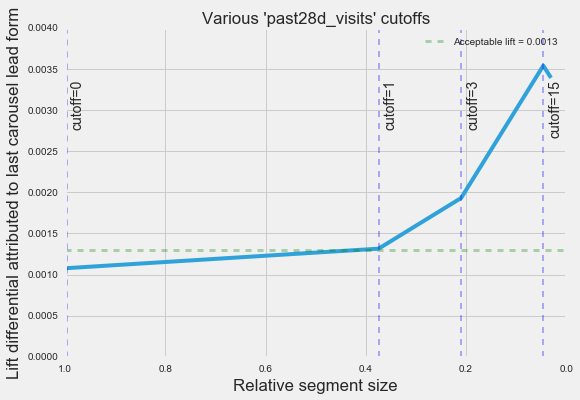

In [173]:
y = [r[1] for r in results]
x_size = [r[2] for r in results]
x_cut = [r[0] for r in results]

plt.style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(x_size, y)
ax1.set_ylim(0, 0.004)
ax1.set_xlabel("Relative segment size")
ax1.set_ylabel("Lift differential attributed to last carousel lead form")
ax1.invert_xaxis()

ax2.set_xlabel("Various 'past28d_visits' cutoffs")
ax2.get_xaxis().set_ticks([])
# ax2.plot(x_cut, np.ones(len(x_cut))) # Create a dummy plot

#Horizontal lift threshold line
plt.axhline(y=0.0013, ls='--', color='g', linewidth=3, label="Acceptable lift = 0.0013", alpha=0.3)

#Vertical cutoff lines
plt.axvline(0.001, ls='--', linewidth=3, alpha=0.3)
plt.axvline(1-0.3743126, ls='--', linewidth=2, alpha=0.3)
plt.axvline(1-0.2096169, ls='--', linewidth=2, alpha=0.3)
plt.axvline(1-0.0457117, ls='--', linewidth=2, alpha=0.3)

#Line labels
plt.text(0.001+0.01,0.00325,'cutoff=0',rotation=90)
plt.text(1-0.3743126+0.01,0.00325,'cutoff=1',rotation=90)
plt.text(1-0.2096169+0.01,0.00325,'cutoff=3',rotation=90)
plt.text(1-0.0457117+0.01,0.00325,'cutoff=15',rotation=90)

plt.legend()
plt.show();

In [98]:
print()
print('past28d_views_section_ldp')
print("cutoff conversion from last carousel relative seg size")
print("====== ============================= =================")

for cutoff in [0,1,3,15,20]:
    print(lift_control_calc_2('past28d_views_section_ldp', cutoff)[1:4])


past28d_views_section_ldp
cutoff conversion from last carousel relative seg size
====== ============================= =================
(0, 0.0010765042928561133, 1.0)
(1, 0.0013368591862769705, 0.35349103343172394)
(3, 0.0019681583121039445, 0.2828606823523155)
(15, 0.002214608578775753, 0.15422479095429742)
(20, 0.0021899272186921594, 0.12943090236036645)


In [185]:
results = [(lift_control_calc_2('past28d_views_section_ldp', cutoff)[1:4]) for cutoff in [0,1,3,15,20]]

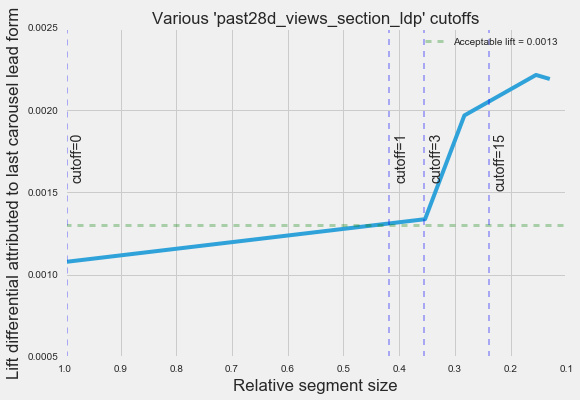

In [190]:
y = [r[1] for r in results]
x_size = [r[2] for r in results]
x_cut = [r[0] for r in results]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(x_size, y)
ax1.set_ylim(0.0005, 0.0025)
ax1.set_xlabel("Relative segment size")
ax1.set_ylabel("Lift differential attributed to last carousel lead form")
ax1.invert_xaxis()

ax2.set_xlabel("Various 'past28d_views_section_ldp' cutoffs")
ax2.get_xaxis().set_ticks([])
# ax2.plot(x_cut, np.ones(len(x_cut))) # Create a dummy plot

#Horizontal lift threshold line
plt.axhline(y=0.0013, ls='--', color='g', linewidth=3, label="Acceptable lift = 0.0013", alpha=0.3)

#Vertical cutoff lines
plt.axvline(0.001, ls='--', linewidth=3, alpha=0.3)
plt.axvline(1-0.353491, ls='--', linewidth=2, alpha=0.3)
plt.axvline(1-0.282860, ls='--', linewidth=2, alpha=0.3)
plt.axvline(1-0.154224, ls='--', linewidth=2, alpha=0.3)

#Line labels
plt.text(0.001+0.01,0.0018,'cutoff=0',rotation=90)
plt.text(1-0.353491+0.01,0.0018,'cutoff=1',rotation=90)
plt.text(1-0.282860+0.01,0.0018,'cutoff=3',rotation=90)
plt.text(1-0.154224+0.01,0.0018,'cutoff=15',rotation=90)

plt.legend()
plt.show();